# 散列表  
散列表用于快速查找元素，包括开放寻址法和拉链法  
拉链法类似于邻接表  
*acwing 散列表模拟*  
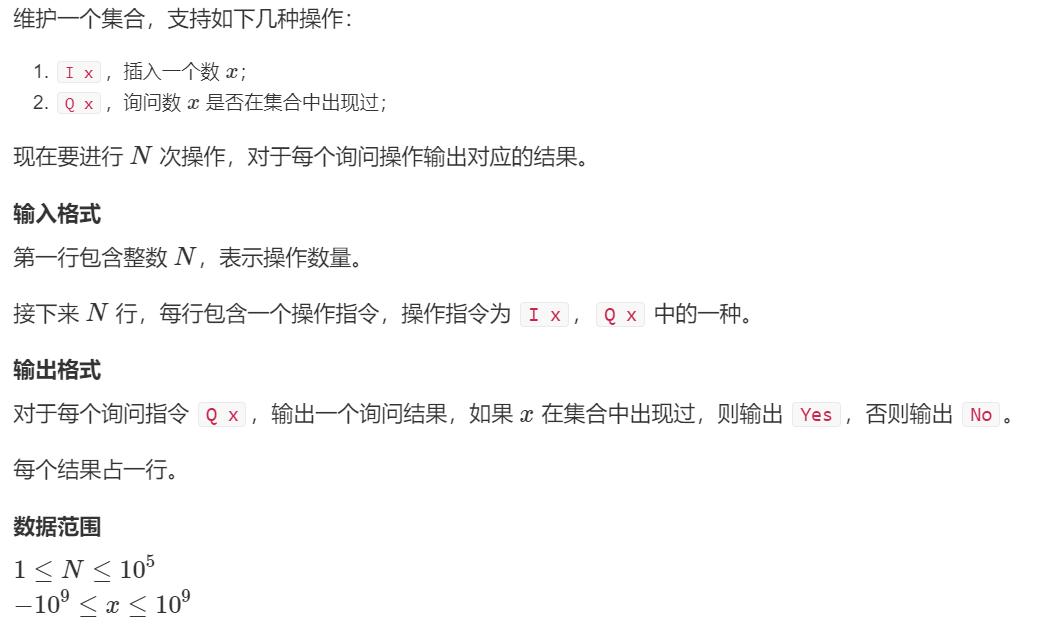

## 拉链法  

```c
#include <iostream>
#include <cstring>
using namespace std;
// 模拟散列表，使用拉链法
const int N = 100003;

int e[N], ne[N], h[N], n, idx = 0;

void insert(int x)
{
    // 将负数和正数散列到0-N之间
    int t = (x%N + N)%N;
    e[idx] = x;
    ne[idx] = h[t];
    h[t] = idx++;
}

void query(int x)
{
    int t = (x%N + N) % N;
    int k = h[t];
    while(k != -1 && e[k] != x)
    {
        k = ne[k];
    }
    if(k != -1)
    puts("Yes");
    else
    puts("No");
}

int main()
{
    memset(h, -1, sizeof(h));
    cin >> n;
    while(n--)
    {
        string op;
        // 最好用字符串形式读取字符，这样可以忽略空格和回车等符号
        cin >> op;
        int x;
        if(op[0] == 'I')
        {
            cin >> x;
            insert(x);
        }else
        {
            cin >> x;
            query(x);
        }
    }
    return 0;
}
```

## 开放寻址法  
开一个一维数组进行映射，一般将数组开为题目中数据个数的2~3倍，先对数组中每个元素进行标记  
将标记值设为大于数据范围内的一个数 

```c
#include <iostream>
#include <cstring>
using namespace std;
const int N = 200003;
//开辟一个一维数组用于映射
int e[N], null = 0x3f3f3f3f;

int find(int x)
{
    int ans = (x%N + N)%N;
    while(e[ans] != null && e[ans] != x)
    {
        ans++;
        if(ans == N)
        ans = 0;
    }
    return ans;
}

int main()
{
    //先对哈希数组进行初始化，以进行标记该位置是否存有值
    memset(e, 0x3f, sizeof(e));
    int n;
    cin >> n;
    while(n--)
    {
        char op[2];
        int x;
        scanf("%s%d", op, &x);
        int k = find(x);
        if(*op == 'I')
        {
            e[k] = x;
        }else 
        {
            if(e[k] == null)
            puts("No");
            else
            {
                puts("Yes");
            }
        }
    }
    return 0;
}
```